<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML%26DL/12%EC%9B%94%2018%EC%9D%BC/12%EC%9B%94_18%EC%9D%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
x_data의 shape : (20, 150, 150, 3)
t_data의 shape : (20,)


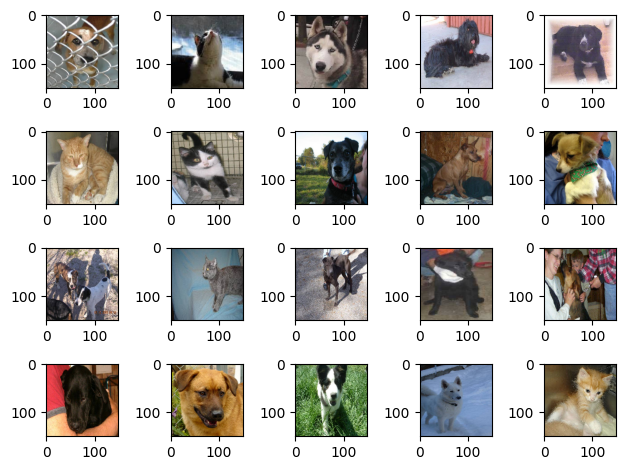

In [ ]:
# 우리에게 제공된 이미지로부터 pixel 데이터를 추출하기 위해
# Keras가 제공하는 ImageDataGenerator를 사용!

import os  # 폴더명 붙일때 많이 사용?
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 학습을 위해서 train data와 validation data가 필요
# 지금까지는 학습할 때 train data 중 일부(2~30%)를 validation에 사용
# validation_split = 0.3 -> 이런식으로
# 아예 validation data를 별도로 사용할 수 있음!

train_dir = '/content/drive/MyDrive/AI스쿨 파일/ML/cat_dog_small/train'
validation_dir = '/content/drive/MyDrive/AI스쿨 파일/ML/cat_dog_small/validation'

# ImageDataGenerator 객체를 생성!
# pixel값(RGB)은 각각 0~255 사이의 값을 가져요
# 정규화된 pixel 데이터를 가져오기 위해서 rescale을 사용해요!
train_gen = ImageDataGenerator(rescale=1/255)  # 각각의 pixel값을 255로 나누겠다는 의미 -> 값이 0~1사이로 변한다
validation_gen= ImageDataGenerator(rescale=1/255)

train_generator = train_gen.flow_from_directory(
    train_dir,  # 어떤 폴더에서 이미지를 가져올지 설정
    classes=['cats','dogs'],  # 폴더명을 명시!
                              # cats 폴더에서 가져온 pixel data의 label을 0으로
                              # dogs 폴더에서 가져온 pixel data의 label을 1로 설정 의미
                              # [] 안의 폴더명 순서가 의미가 있음

    target_size=(150,150),    # 이미지 size를 똑같이 만듦(이미지 파일은 크기가 모두 다르기 때문에 같게 설정)

    batch_size = 20,          # 한번에 20개의 이미지를 가져와서 pixel 데이터로
                              # 주의! -> label에 상관없이 가져옴
                              # 개 10개, 고양이 10개 가져오는게 아니라, 두 개 합쳐서 20개 가져온다!

    class_mode = 'binary'     # 이진분류 -> binary, 다중분류 -> categorical
)

validation_generator = validation_gen.flow_from_directory(
    validation_dir,
    classes=['cats','dogs'],
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary'
)


# generator를 만들었으니 실제로 한번 동작시켜 데이터를 잘 추출하는지 확인!
# x_data는 당연히 이미지의 pixel data,
# t_data는 이미지의 label(0 혹은 1)
for x_data, t_data in train_generator:
    print(f'x_data의 shape : {x_data.shape}')  # (20,150,150,3)
    print(f't_data의 shape : {t_data.shape}')  # (20,)
    break

# 가져온 픽셀 데이터가 진짜 이미지의 픽셀 데이터인지 확인해보아요!
# 픽셀 데이터를 이용해 그림을 그려보면 되겠죠!
fig = plt.figure()
axs = []  # subplot 저장되는 리스트
for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))

for x_data, t_data in train_generator:
    for idx, img_data in enumerate(x_data):  # enumerate 하면 맨 앞이 idx, 나머지는 img_data에 들어감
         axs[idx].imshow(img_data)
    break

plt.tight_layout()
plt.show()

In [ ]:
# 이렇게 ImageGenerator의 사용법을 익히고
# 이걸 이용해서 Keras Model 만들고 이미지 학습을 진행하면 될 것 같아요!
# 학습에 사용하는 데이터는
# train용으로 각각 1000장
# validation용으로 각각 500장(test용도 마찬가지)
# 총 4000장의 이미지를 사용할 예정(전체 이미는 25000장)
# 일부 이미지를 가지고 학습 및 평가 진행(당연히 성능은 bad!)

In [ ]:
# 위쪽에서 generator를 만들었으니
# 이제 모델을 만들고 학습을 진행

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

# CNN을 구현할거니까 처음에는 Feature Extraction 부분이 나와요
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 input_shape=(150,150,3)))
                 # filter의 shape => (3,3,3,32) 필터의 channel은 입력 데이터의 channel과 동일

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

# FC Layer(DNN 학습)
model.add(Flatten())  # 4차원 데이터 -> 2차원으로 변경

# hidden layer -> 선택사항(안 넣어도 되고 몇개만 넣어도 됨)
model.add(Dense(units=512,
                activation='relu'))

# output layer
model.add(Dense(units=1,
                activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])


In [ ]:
# 모델이 완성되었으면 학습을 진행해요!

# 조기종료 설정
from tensorflow.keras.callbacks import EarlyStopping
es_cb = EarlyStopping(monitor='val_loss',
                      patience=5,
                      restore_best_weights=True)

# 학습 데이터와 validation 데이터가 generator로 되어있어요
# train_generator는 1번 실행하면 20개의 이미지 pixel을 가져와요
# 그런데 1 epoch을 돌리면 이미지 몇개 가져와야 하나요? 2000
# 따라서 데이터를 100번 실행해야 20 * 100 -> 2000개의 이미지를 가져와 학습할 수 있어
history = model.fit(train_generator,
                    steps_per_epoch=100,  # 한 epoch당 generator 몇번 실행할 것인지
                    epochs=50,
                    validation_data = validation_generator,
                    validation_steps=50,
                    callbacks=[es_cb],
                    verbose=1)
# Epoch 10/50
# 100/100 [==============================] - 294s 3s/step - loss: 0.2016 - acc: 0.9270 - val_loss: 0.6624 - val_acc: 0.7300

Epoch 1/50
100/100 [==============================] - 463s 5s/step - loss: 0.6858 - acc: 0.5430 - val_loss: 0.6590 - val_acc: 0.6040
Epoch 2/50
100/100 [==============================] - 289s 3s/step - loss: 0.6176 - acc: 0.6605 - val_loss: 0.6093 - val_acc: 0.6800
Epoch 3/50
100/100 [==============================] - 348s 3s/step - loss: 0.5450 - acc: 0.7270 - val_loss: 0.5864 - val_acc: 0.6890
Epoch 4/50
100/100 [==============================] - 314s 3s/step - loss: 0.4926 - acc: 0.7555 - val_loss: 0.5627 - val_acc: 0.7060
Epoch 5/50
100/100 [==============================] - 296s 3s/step - loss: 0.4352 - acc: 0.8005 - val_loss: 0.5546 - val_acc: 0.7260
Epoch 6/50
100/100 [==============================] - 290s 3s/step - loss: 0.3868 - acc: 0.8255 - val_loss: 0.5946 - val_acc: 0.7130
Epoch 7/50
100/100 [==============================] - 285s 3s/step - loss: 0.3426 - acc: 0.8565 - val_loss: 0.5799 - val_acc: 0.7240
Epoch 8/50
100/100 [==============================] - 294s 3s/step - 

In [ ]:
# overfitting이 많이 발생하게 되요
# 가장 큰 이유는 일단 이미지수가 너무 적어요!
# 총 25,000개 중 4,000개만 학습에 이용
# 정확히는 2000의 이미지만 학습에 이용, 2000개는 validation과 test에 이용
# 이미지 증식(Image Augmentation)을 통해서 학습이미지 수를 늘려서 진행!

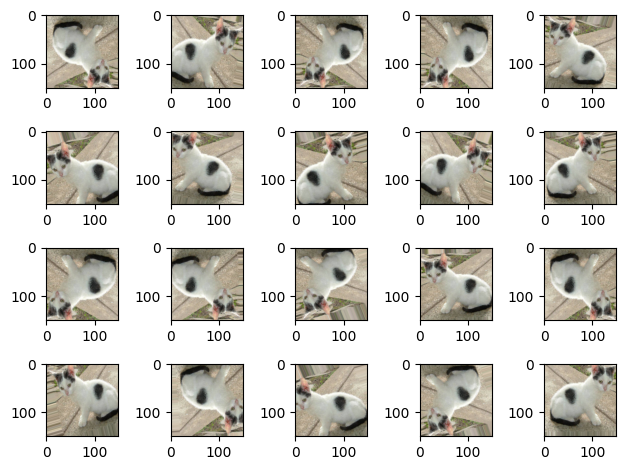

In [ ]:
# 이미지 증식이 포함된 코드
# 이미지 증식 = 약간의 변형을 해 비슷한 이미지 만드는 것!
# 새로운 이미지를 만드는게 아니다!!

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 각도, 비율 크게 잡으면 안된다 --> 이미지가 완전 다른 형태로 나오기 때문!!
# 0.1 -> 10% 의미
datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=20,  # rotation_range -> 회전 각도 범위 설정(0~20도 사이)
                             width_shift_range=0.1,  # 가로 방향(세로 or 가로)이동 범위 설정(0.1 -> 10%)
                             height_shift_range=0.1, # 세로(위,아래 방향)
                             shear_range=0.1,  # 이미지 밀림 정도(동그랗게 말아주는 정도?)
                             zoom_range = 0.1,
                             horizontal_flip=True,
                             vertical_flip=True,  # 사용시 주의! -> 위아래로 뒤집히면 새로운 이미지가 되기 때문
                             fill_mode='nearest')  # 변형시, 원래 이미지의 빈 공간을 어떻게 채울지에 대한 설정
                                                   # nearest -> 근처 있는 픽셀의 값으로 채워넣는다 의미

# 이미지 확인
img = image.load_img('/content/drive/MyDrive/AI스쿨 파일/ML/cat_dog_small/train/cats/cat.3.jpg',
                       target_size=(150,150))
x = image.img_to_array(img)
type(x)
x.shape  # 150,150,3

# ImageGenerator를 이용해서 이 파일로부터 증식된 이미지를 추출!
# 기본적으로 ImageDataGenerator는 4차원을 사용
# 우리 이미지도 역시 4차원으로 표현해야!
x = x.reshape((1,) + x.shape)
x.shape

fig = plt.figure()
axs = []
for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))

idx=0
for batch in datagen.flow(x,batch_size=1):
    axs[idx].imshow(image.array_to_img(batch[0]))  # batch[0]는 픽셀 데이터(변형된 이미지)
    idx += 1
    if idx%20==0:
        break
plt.tight_layout()
plt.show()




In [ ]:
# 우리가 가진 얼마안되는 데이터(학습 데이터 개와 고양이 2000장)
# 증식기법을 이용해서 변경된 이미지를 이용해서 학습데이터 수를 늘리고
# dropout 기법 활용해서 Overfitting을 줄이기

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/AI스쿨 파일/ML/cat_dog_small/train'
validation_dir = '/content/drive/MyDrive/AI스쿨 파일/ML/cat_dog_small/validation'

# ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotate_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# validation data는 증식을 사용하면 안되요!(평가용 데이터이기 때문)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes=['cats','dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

# model 생성
model = Sequential()

model.add(Conv2D(filter=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filter=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filter=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filter=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

# 여기까지가 Feature Extraction 부분이에요! 이미지의 특징을 추출하는 부분
# 이렇게 이미지의 특징을 추출한 후 2차원으로 변경해서 학습을 진행

model.add(Flatten())

model.add(Dropout(rate=0.5))

# hidden layer
model.add(Dense(units=512,
                activation='relu'))

# output layer
model.add(Dense(units=1,
                activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metric=['acc'])

# overfitting 정도를 확인하기 위해 EarlyStopping은 설정하지 않아요!
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=50,
                    verbose=1)

# 오래걸려서 런타이 만료될 수 있어요. 그래서 학습이 끝나면 파일에 저장꺼에요!
# 즉, 학습이 끝난 우리의 모델과 계산된 가중치를 파일에 저장!!
model.save('./cat_dog_small_cnn_model.h5')

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
valid_loss = history.history['val_loss']

train_acc = history.history['acc']
valid_acc = history.history['val_acc']

plt.plot(train_loss, color='r')
plt.plot(valid_loss, color='b')
plt.show()



In [ ]:
# 전이학습(Transfer Learning) -> 내일 다시 시작
# 기존 Network(기학습된 Network-Pretrained Network)을 이용해서
# 이미지 학습에 필수적인 Feature Extraction 부분을 직접 구현하지 않고
# Pretrained Network이 가지고 있는 Feature Extraction 부분

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/AI스쿨 파일/ML/cat_dog_small/train'
validation_dir = '/content/drive/MyDrive/AI스쿨 파일/ML/cat_dog_small/validation'

# ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotate_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# validation data는 증식을 사용하면 안되요!(평가용 데이터이기 때문)
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes=['cats','dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

# 여기서부터 달라짐
# 모델을 생성해보아요!
from tensorflow.keras.applications import VGG16

# VGG16은 이미 만들어진 CNN 모델
# 이 모델을 만들기 위한 입력 데이터셋이 있어요!
# 전세계적으로 유명한 데이터셋들이 있음(COCO Datast, PASCAL VOC Dataset, Imagenet Dataset ....)

model_base = VGG16(weights='imagenet',  # weights = 어떤 데이터셋을 가지고 만들었는지
                   include_top=False,   # True이면 모델 가져올때 classifier를 포함해서 가져옴
                                        # False이면 classifier 빼고 Feature Extraction 부분만 가져옴 -> 거의 대부분 False로 잡음
                   input_shape=(150,150,3),
                   )

